In [1]:
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
excel_document = openpyxl.load_workbook('files/MUERTOS.xlsx')
sheets=excel_document.get_sheet_names()
#sheets.reverse()
list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:])
df5=pd.DataFrame(columns=list(pd.read_excel('files/MUERTOS.xlsx',sheets[1]).columns[:]))
for x in range(len(excel_document.get_sheet_names())):
    df5=pd.concat([df5, pd.read_excel('files/MUERTOS.xlsx',sheets[x], parse_dates=['Fecha Ocurrencia'], index=True)])
    df5.index=list(range(len(df5['Fecha Ocurrencia'])))
df5=pd.DataFrame({'Fecha Ocurrencia':df5['Fecha Ocurrencia'],
                 'Hora Ocurrencia':df5['Hora Ocurrencia'],
                 'Edad Víctima':df5['Años'],
                 'Sexo':df5['Sexo'],
                 'Clase de Accidente':df5['Clase'],
                 'Condición Víctima':df5['Condicion'],
                 'Vehículo Víctima o vehículo que atropella':df5['Vehículo Víctima o vehículo que atropella'],
                 'Dirección Ocurrencia':df5['Direccion Ocurrencia'],
                 'Prueba Embriaguez':df5['Embriaguez '],
                 'Empresa Servicio Público':df5['Empresa'],
                 'Fecha Levantamiento':df5['Fecha Levantamiento'],
                 'Lugar de Inspección':df5['Lugar de Inspección'],
                 'Servicio Publico o Particular':df5['Servicio'],
                 'Muertes':df5['Fecha Ocurrencia'].replace(df5['Fecha Ocurrencia'], 1)})
for x in range(len(list(df5.axes[1]))):
    for y in range(len(df5)):
        if df5[df5.columns[x]][y] == 'Sin inf.' or df5[df5.columns[x]][y] == 'No Reporta' or df5[df5.columns[x]][y] == 'NR'or df5[df5.columns[x]][y] == 'Sin Inf' or df5[df5.columns[x]][y] == 'Sin inf' or df5[df5.columns[x]][y] == 'sin inf' or df5[df5.columns[x]][y] == 'No reporta':
            df5[df5.columns[x]][y] = np.NaN
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'Caida Ocupante' or df5['Clase de Accidente'][y] == 'Caída de Ocupante'or df5['Clase de Accidente'][y] == 'caida ocupante':
            df5['Clase de Accidente'][y] = 'Caída Ocupante'
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'atropello':
            df5['Clase de Accidente'][y] = 'Atropello'
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'Otros' or df5['Clase de Accidente'][y] == 'Otro':
            df5['Clase de Accidente'][y] = 'Otra' 
for y in range(len(df5)):
        if df5['Clase de Accidente'][y] == 'choque' or df5['Clase de Accidente'][y] == 'Choque ':
            df5['Clase de Accidente'][y] = 'Choque'
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Conductor Auto' or df5['Condición Víctima'][y] == 'Conductor Camioneta' or df5['Condición Víctima'][y] =='Conductor Campero' or df5['Condición Víctima'][y] == 'Conductor Furgon':
            df5['Condición Víctima'][y] = 'Conductor'
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Pasajero Auto' or df5['Condición Víctima'][y] == 'Pasajero Bus' or df5['Condición Víctima'][y] =='Pasajero Buseta' or df5['Condición Víctima'][y] == 'Pasajero Microbus':
            df5['Condición Víctima'][y] = 'Pasajero'            
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Pasajero Moto':
            df5['Condición Víctima'][y] = 'Parrillero'             
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Acompañante':
            df5['Condición Víctima'][y] = 'Pasajero'
for y in range(len(df5)):
        if df5['Condición Víctima'][y] == 'Peatón (Silla de Ruedas)':
            df5['Condición Víctima'][y] = 'Peatón'



C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  if __name__ == '__main__':
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  del sys.path[0]
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Paolo Camacho\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

#GRAFICOS CLASE DE ACCIDENTE ANUAL

In [7]:
data=df5.groupby([pd.Grouper(freq='Y', key='Fecha Ocurrencia'), 'Condición Víctima']).sum().reset_index()
data['Fecha Ocurrencia']=data['Fecha Ocurrencia'].dt.year
data=data.rename(columns={'Fecha Ocurrencia':'Año Ocurrencia'})
data

,Año Ocurrencia,Condición Víctima,Muertes
0,2008,Ciclista,18
1,2008,Conductor,9
2,2008,Motociclista,94
3,2008,Parrillero,22
4,2008,Pasajero,13
5,2008,Peatón,171
6,2009,Ciclista,17
7,2009,Conductor,11
8,2009,Motociclista,92
9,2009,Parrillero,18


In [8]:
y = df5.groupby('Condición Víctima')

In [9]:
y.groups.keys()

dict_keys(['Ciclista', 'Conductor', 'Motociclista', 'Parrillero', 'Pasajero', 'Peatón'])

In [52]:
data=byyear.groupby(['Clase de Accidente'])

In [54]:
df7=pd.DataFrame({'year': byyear['year'],
                 'Clase de Accidente': list(data['Clase de Accidente'].value_counts())
                 })

df7


,year,Clase de Accidente
0,2008,1
1,2009,1
2,2010,1
3,2011,1
4,2012,1
5,2013,1
6,2014,1
7,2015,1
8,2016,1
9,2017,1


In [222]:
list(byyear['year'])

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

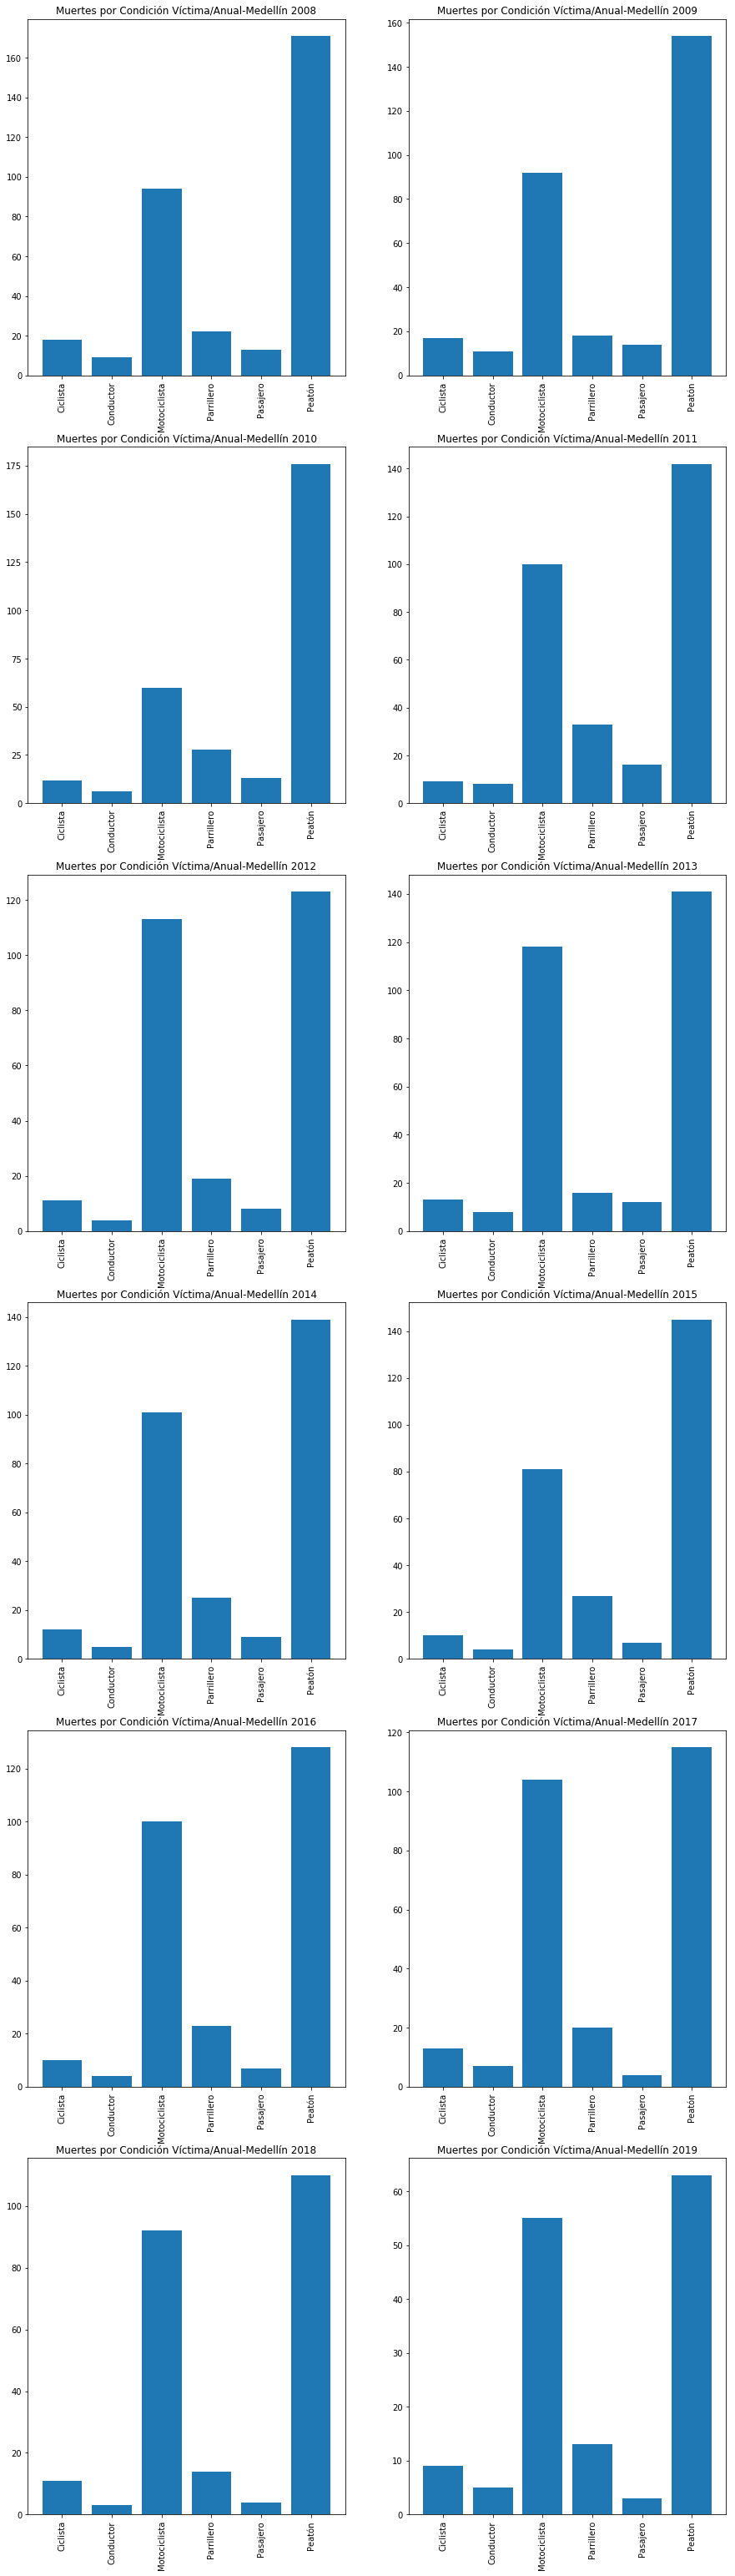

In [16]:
plt.figure(figsize=(15,55))
for index in range(len(sheets)):
    plt.subplot(len(sheets)/2, 2, index+1)
    y=data.loc[data.groupby('Año Ocurrencia').groups[list(data.groupby(data['Año Ocurrencia']).groups.keys())[index]]]
    plt.bar(range(len(y)), y['Muertes'])
    plt.xticks(range(len(y)),list(y.groupby('Condición Víctima').groups.keys()),rotation='vertical')
    plt.title("Muertes por Condición Víctima/Anual"+"-"+sheets[index]);